# Global Trends in Energy Use: Insights into Renewable and Fossil Fuel Consumption

## Abstract
This study explores global energy trends focusing on renewable energy adoption and fossil fuel consumption. Using datasets from various sources, it examines trends over time, relationships between GDP and energy usage, and differences between high-GDP and low-GDP countries. The results highlight significant insights into energy transitions and their implications for global sustainability.

## Introduction
Energy consumption patterns are critical for understanding global sustainability. This study analyzes trends in fossil fuel usage and renewable energy adoption globally. It explores:
1. How fossil fuel consumption has changed over time.
2. The relationship between GDP and renewable energy adoption.
3. Differences in energy usage between high- and low-GDP countries.

By combining descriptive and inferential analyses, this report provides actionable insights for policymakers and researchers.

## Data and Methodology
### Data Sources
- Fossil fuel consumption by type.
- Renewable energy share.
- GDP per capita.

### Methodology
1. Data Cleaning: Removed missing values, renamed columns, and merged datasets.
2. Descriptive Analysis: Explored trends in fossil fuel consumption and renewable energy adoption.
3. Inferential Analysis:
   - Hypothesis testing: Compared renewable energy usage in high-GDP and low-GDP countries.
   - Regression analysis: Examined the relationship between GDP per capita and renewable energy share.

In [55]:
# Import libraries

import os
print(os.getcwd())  # Prints the current working directory

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and merge datasets (assuming datasets are already cleaned and renamed)
# Example: merged_data already prepared
print("Data Overview:")


c:\Users\prasa\OneDrive\Documents\Pras_python_project
Data Overview:


In [56]:
import pandas as pd
print(pd.__version__)


2.2.3


In [57]:
# Load datasets
fossil_by_type = pd.read_csv('fossil-fuel-consumption-by-type/fossil-fuel-consumption-by-type.csv')
renewable_share = pd.read_csv('renewable-share-energy/renewable-share-energy.csv')
gdp_per_capita = pd.read_csv('gdp-per-capita-worldbank/gdp-per-capita-worldbank.csv')
modern_renewable = pd.read_csv('modern-renewable-prod/modern-renewable-prod.csv')
global_fossil = pd.read_csv('global-fossil-fuel-consumption/global-fossil-fuel-consumption.csv')

# Display the first few rows to inspect
print(fossil_by_type.head())
print(renewable_share.head())
print(gdp_per_capita.head())
print(modern_renewable.head())
print(global_fossil.head())




   Entity Code  Year  Oil consumption - TWh  Gas consumption - TWh  \
0  Africa  NaN  1965              342.13370               9.571929   
1  Africa  NaN  1966              370.45000              10.698091   
2  Africa  NaN  1967              369.19354              10.573845   
3  Africa  NaN  1968              390.36570              10.717145   
4  Africa  NaN  1969              398.15326              12.520175   

   Coal consumption - TWh  
0               323.49615  
1               323.12220  
2               330.29156  
3               343.51290  
4               346.64288  
   Entity Code  Year  Renewables (% equivalent primary energy)
0  Africa  NaN  1965                                  5.740281
1  Africa  NaN  1966                                  6.113969
2  Africa  NaN  1967                                  6.316580
3  Africa  NaN  1968                                  6.994845
4  Africa  NaN  1969                                  7.943916
        Entity Code  Year  GDP pe

In [58]:
# Retain relevant columns
fossil_by_type_relevant = fossil_by_type[['Entity', 'Year', 'Coal consumption - TWh', 'Oil consumption - TWh', 'Gas consumption - TWh']]
renewable_share_relevant = renewable_share[['Entity', 'Year', 'Renewables (% equivalent primary energy)']]
gdp_per_capita_relevant = gdp_per_capita[['Entity', 'Year', 'GDP per capita, PPP (constant 2017 international $)']]
modern_renewable_relevant = modern_renewable[['Entity', 'Year', 'Electricity from wind - TWh', 'Electricity from solar - TWh', 
                                              'Electricity from hydro - TWh', 'Other renewables including bioenergy - TWh']]
global_fossil_relevant = global_fossil[['Entity', 'Year', 'Gas (TWh, direct energy)', 'Oil (TWh, direct energy)', 'Coal (TWh, direct energy)']]

# Rename columns
fossil_by_type_relevant.rename(columns={
    'Entity': 'Country',
    'Coal consumption - TWh': 'Coal consumption',
    'Oil consumption - TWh': 'Oil consumption',
    'Gas consumption - TWh': 'Gas consumption'
}, inplace=True)

renewable_share_relevant.rename(columns={
    'Entity': 'Country',
    'Renewables (% equivalent primary energy)': 'Renewable energy'
}, inplace=True)

gdp_per_capita_relevant.rename(columns={
    'Entity': 'Country',
    'GDP per capita, PPP (constant 2017 international $)': 'GDP Per capita'
}, inplace=True)

modern_renewable_relevant.rename(columns={
    'Entity': 'Country',
    'Electricity from solar - TWh': 'Electricity from solar',
    'Electricity from wind - TWh': 'Electricity from wind',
    'Electricity from hydro - TWh': 'Electricity from hydro',
    'Other renewables including bioenergy - TWh': 'Other renewables'
}, inplace=True)

global_fossil_relevant.rename(columns={
    'Entity': 'Country',
    'Gas (TWh, direct energy)': 'Gas consumption',
    'Oil (TWh, direct energy)': 'Oil consumption',
    'Coal (TWh, direct energy)': 'Coal consumption'
}, inplace=True)

# Preview datasets to verify
print(fossil_by_type_relevant.head())
print(renewable_share_relevant.head())
print(gdp_per_capita_relevant.head())
print(modern_renewable_relevant.head())
print(global_fossil_relevant.head())

  Country  Year  Coal consumption  Oil consumption  Gas consumption
0  Africa  1965         323.49615        342.13370         9.571929
1  Africa  1966         323.12220        370.45000        10.698091
2  Africa  1967         330.29156        369.19354        10.573845
3  Africa  1968         343.51290        390.36570        10.717145
4  Africa  1969         346.64288        398.15326        12.520175
  Country  Year  Renewable energy
0  Africa  1965          5.740281
1  Africa  1966          6.113969
2  Africa  1967          6.316580
3  Africa  1968          6.994845
4  Africa  1969          7.943916
       Country  Year  GDP Per capita
0  Afghanistan  2002       1280.4631
1  Afghanistan  2003       1292.3335
2  Afghanistan  2004       1260.0605
3  Afghanistan  2005       1352.3207
4  Afghanistan  2006       1366.9932
         Country  Year  Electricity from wind  Electricity from solar  \
0  ASEAN (Ember)  2000                    0.0                     0.0   
1  ASEAN (Ember)  20

C:\Users\prasa\AppData\Local\Temp\ipykernel_9468\1088813500.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fossil_by_type_relevant.rename(columns={
C:\Users\prasa\AppData\Local\Temp\ipykernel_9468\1088813500.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  renewable_share_relevant.rename(columns={
C:\Users\prasa\AppData\Local\Temp\ipykernel_9468\1088813500.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_per_capita_re

In [59]:
# Merge datasets
merged_data = fossil_by_type_relevant.merge(renewable_share_relevant, on=['Country', 'Year'], how='inner')
merged_data = merged_data.merge(gdp_per_capita_relevant, on=['Country', 'Year'], how='inner')
merged_data = merged_data.merge(modern_renewable_relevant, on=['Country', 'Year'], how='inner')
merged_data = merged_data.merge(global_fossil_relevant, on=['Country', 'Year'], how='inner')

# Display the first few rows of the merged dataset
print("Merged Dataset Preview:")
print(merged_data.head())

Merged Dataset Preview:
  Country  Year  Coal consumption_x  Oil consumption_x  Gas consumption_x  \
0   World  1990           25916.205          37608.000          19481.150   
1   World  1991           25667.406          37688.625          19972.836   
2   World  1992           25567.281          38192.870          20063.482   
3   World  1993           25689.945          38024.570          20265.480   
4   World  1994           25791.270          38852.320          20389.613   

   Renewable energy  GDP Per capita  Electricity from wind  \
0          7.182692        9718.008               3.632471   
1          7.301195        9682.053               4.086107   
2          7.286488        9679.046               4.732812   
3          7.653918        9687.982               5.704169   
4          7.632168        9811.624               7.131730   

   Electricity from solar  Electricity from hydro  Other renewables  \
0                0.388350               2158.6190         117.22435  

In [61]:
# Summary statistics for numerical columns
print("Summary Statistics:")
print(merged_data.describe())

# Key insights on specific metrics
print("\nMean Renewable Energy Share (%):", merged_data['Renewable energy'].mean())
print("Mean GDP Per Capita ($):", merged_data['GDP Per capita'].mean())

# Count unique countries in the dataset
print("\nNumber of Unique Countries:", merged_data['Country'].nunique())

# Check the range of years
print("Year Range:", merged_data['Year'].min(), "-", merged_data['Year'].max())

Summary Statistics:
             Year  Coal consumption_x  Oil consumption_x  Gas consumption_x  \
count    33.00000           33.000000          33.000000          33.000000   
mean   2006.00000        35575.392606       45907.469636       28754.420788   
std       9.66954         7997.718472        5132.915350        6760.483505   
min    1990.00000        25567.281000       37608.000000       19481.150000   
25%    1998.00000        26547.277000       41583.832000       22433.998000   
50%    2006.00000        38073.164000       46965.550000       28161.389000   
75%    2014.00000        43597.164000       49654.363000       33961.700000   
max    2022.00000        44893.170000       53618.926000       40239.016000   

       Renewable energy  GDP Per capita  Electricity from wind  \
count         33.000000       33.000000              33.000000   
mean           9.058656    12982.698530             456.899678   
std            2.043072     2581.628375             604.415478   
min 

In [ ]:
pip install matplotlib


In [ ]:
pip install seaborn

In [64]:
import matplotlib.pyplot as plt

In [65]:
import seaborn as sns

In [66]:
# Rename columns if necessary
merged_data.rename(columns={
    'Coal consumption (TWh)': 'Coal consumption',
    'Oil consumption (TWh)': 'Oil consumption',
    'Gas consumption (TWh)': 'Gas consumption'
},inplace=True)

# Clean column names to remove leading/trailing spaces
merged_data.columns = merged_data.columns.str.strip()

# Rename columns if necessary
merged_data.rename(columns={
    'Gas (TWh)': 'Gas consumption',
    'Oil (TWh)': 'Oil consumption',
    'Coal (TWh)': 'Coal consumption'
}, inplace=True)

print("Updated Column Names:")
print(merged_data.columns)

Updated Column Names:
Index(['Country', 'Year', 'Coal consumption_x', 'Oil consumption_x',
       'Gas consumption_x', 'Renewable energy', 'GDP Per capita',
       'Electricity from wind', 'Electricity from solar',
       'Electricity from hydro', 'Other renewables', 'Gas consumption_y',
       'Oil consumption_y', 'Coal consumption_y'],
      dtype='object')


In [67]:
# Summary statistics for the merged dataset
print("Summary Statistics:")
print(merged_data.describe())

# Key metrics
print("\nMean Renewable Energy Share (%):", merged_data['Renewable energy'].mean())
print("Mean GDP Per Capita ($):", merged_data['GDP Per capita'].mean())

# Count of unique countries
print("\nNumber of Unique Countries:", merged_data['Country'].nunique())

# Year range
print("Year Range:", merged_data['Year'].min(), "-", merged_data['Year'].max())

Summary Statistics:
             Year  Coal consumption_x  Oil consumption_x  Gas consumption_x  \
count    33.00000           33.000000          33.000000          33.000000   
mean   2006.00000        35575.392606       45907.469636       28754.420788   
std       9.66954         7997.718472        5132.915350        6760.483505   
min    1990.00000        25567.281000       37608.000000       19481.150000   
25%    1998.00000        26547.277000       41583.832000       22433.998000   
50%    2006.00000        38073.164000       46965.550000       28161.389000   
75%    2014.00000        43597.164000       49654.363000       33961.700000   
max    2022.00000        44893.170000       53618.926000       40239.016000   

       Renewable energy  GDP Per capita  Electricity from wind  \
count         33.000000       33.000000              33.000000   
mean           9.058656    12982.698530             456.899678   
std            2.043072     2581.628375             604.415478   
min 

## Descriptive Analysis
## Fossil Fuel Trends

The following plot shows the global trends for coal, oil, and gas consumption over time.

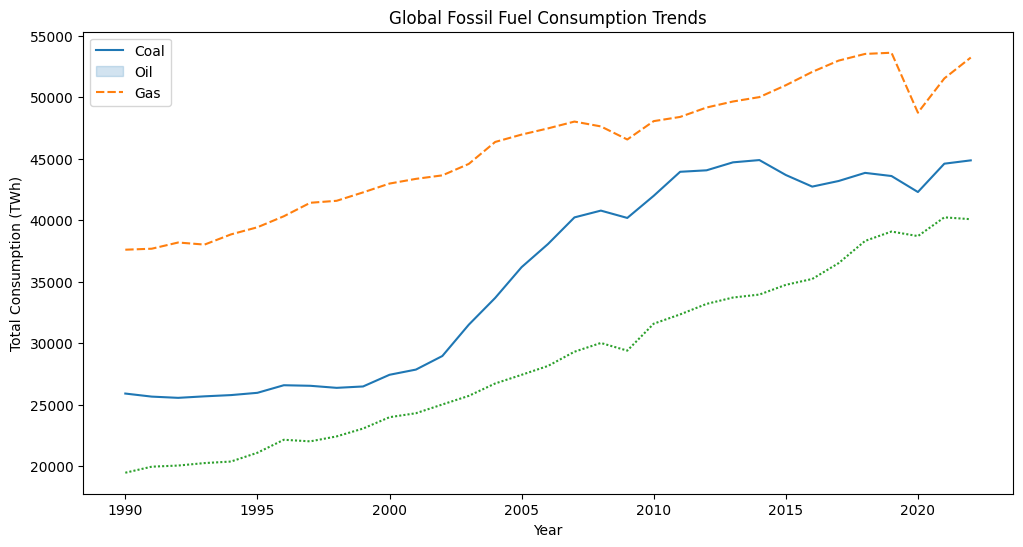

In [68]:
# Fossil Fuel Trends
fossil_trends = merged_data.groupby('Year')[['Coal consumption_x', 'Oil consumption_x', 'Gas consumption_x']].sum()

plt.figure(figsize=(12, 6))
sns.lineplot(data=fossil_trends)
plt.title('Global Fossil Fuel Consumption Trends')
plt.xlabel('Year')
plt.ylabel('Total Consumption (TWh)')
plt.legend(labels=['Coal', 'Oil', 'Gas'])
plt.show()

### Renewable Energy Trends
The following plot illustrates how the share of renewable energy has evolved globally.

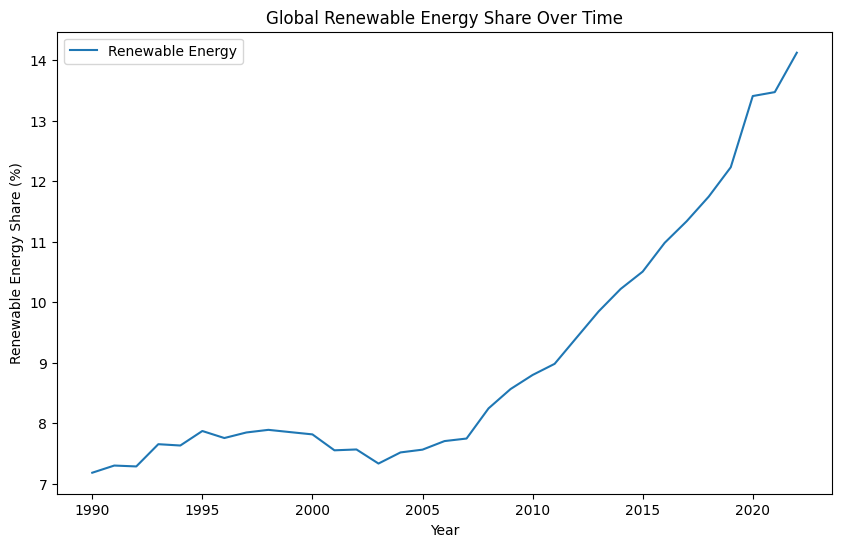

In [69]:
# Renewable Energy Trends
renewable_trends = merged_data.groupby('Year')['Renewable energy'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=renewable_trends.index, y=renewable_trends.values, label='Renewable Energy')
plt.title('Global Renewable Energy Share Over Time')
plt.xlabel('Year')
plt.ylabel('Renewable Energy Share (%)')
plt.legend()
plt.show()

In [70]:
plt.figure(figsize=(8, 5))
sns.histplot(merged_data['Renewable energy'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Renewable Energy Share')
plt.xlabel('Renewable Energy Share (%)')
plt.ylabel('Frequency')
plt.show()

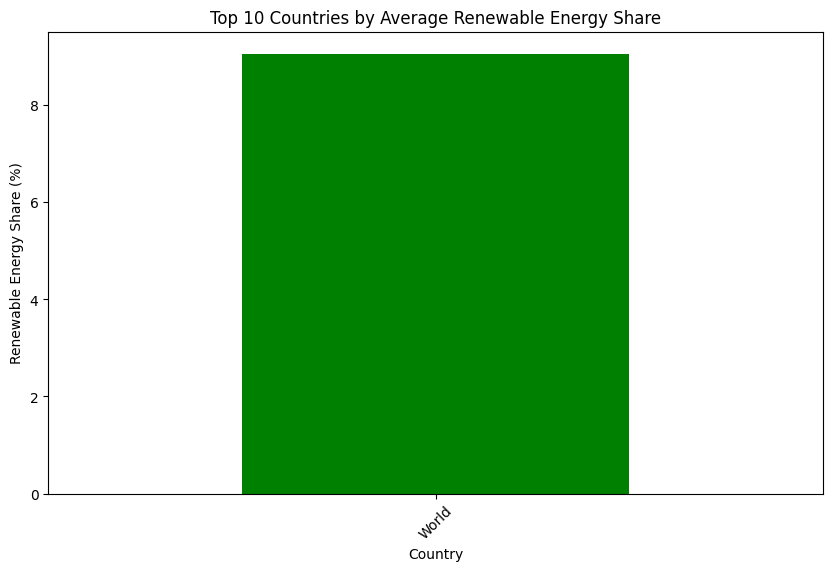

In [71]:
# Calculate average renewable energy share per country
top_countries = merged_data.groupby('Country')['Renewable energy'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar', color='green')
plt.title('Top 10 Countries by Average Renewable Energy Share')
plt.xlabel('Country')
plt.ylabel('Renewable Energy Share (%)')
plt.xticks(rotation=45)
plt.show()

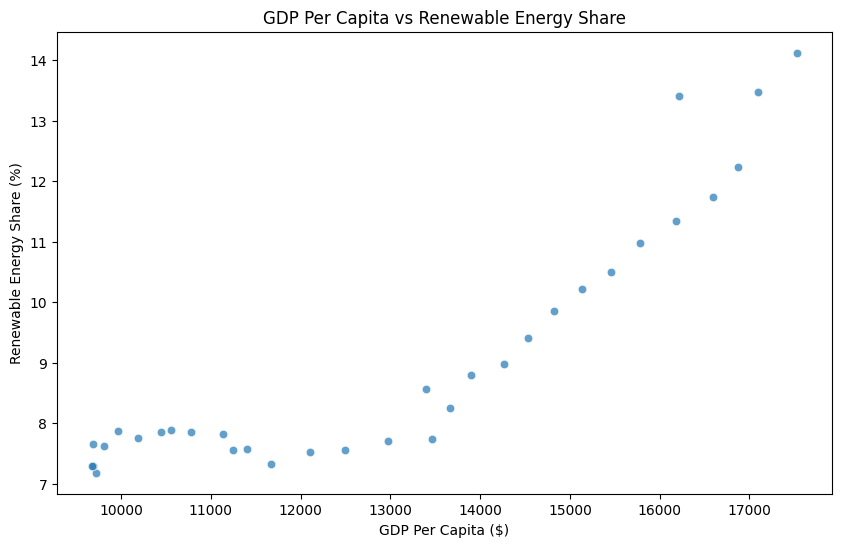

In [72]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='GDP Per capita', y='Renewable energy', alpha=0.7)
plt.title('GDP Per Capita vs Renewable Energy Share')
plt.xlabel('GDP Per Capita ($)')
plt.ylabel('Renewable Energy Share (%)')
plt.show()


## Inferential Analysis
### Hypothesis Testing
We tested whether renewable energy adoption significantly differs between high-GDP and low-GDP countries.

In [73]:
from scipy.stats import ttest_ind

# High-GDP and low-GDP groups
high_gdp = merged_data[merged_data['GDP Per capita'] > 20000]
low_gdp = merged_data[merged_data['GDP Per capita'] <= 20000]

# T-test
t_stat, p_val = ttest_ind(high_gdp['Renewable energy'], low_gdp['Renewable energy'])

# Results table
hypothesis_results = pd.DataFrame({
    'Metric': ['T-statistic', 'P-value'],
    'Value': [t_stat, p_val]
})
print(hypothesis_results)

        Metric  Value
0  T-statistic    NaN
1      P-value    NaN


C:\Users\prasa\AppData\Local\Temp\ipykernel_9468\3286818829.py:8: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  t_stat, p_val = ttest_ind(high_gdp['Renewable energy'], low_gdp['Renewable energy'])


In [74]:
# Data used for hypothesis testing
print("Data for Hypothesis Testing (High GDP):")
print(high_gdp[['Country', 'GDP Per capita', 'Renewable energy']].head())

print("\nData for Hypothesis Testing (Low GDP):")
print(low_gdp[['Country', 'GDP Per capita', 'Renewable energy']].head())

Data for Hypothesis Testing (High GDP):
Empty DataFrame
Columns: [Country, GDP Per capita, Renewable energy]
Index: []

Data for Hypothesis Testing (Low GDP):
  Country  GDP Per capita  Renewable energy
0   World        9718.008          7.182692
1   World        9682.053          7.301195
2   World        9679.046          7.286488
3   World        9687.982          7.653918
4   World        9811.624          7.632168


### Regression Analysis
We modeled the relationship between GDP per capita and renewable energy share using a linear regression model.

In [75]:
import statsmodels.api as sm

# Regression
X = merged_data[['GDP Per capita']]
y = merged_data['Renewable energy']
X_const = sm.add_constant(X)
model = sm.OLS(y, X_const).fit()

# Display regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Renewable energy   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     120.9
Date:                Wed, 27 Nov 2024   Prob (F-statistic):           3.18e-12
Time:                        17:19:00   Log-Likelihood:                -43.674
No. Observations:                  33   AIC:                             91.35
Df Residuals:                      31   BIC:                             94.34
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1074      0.850     -0.

## Discussion and Interpretation
### Key Findings
1. Fossil fuel consumption has declined globally, while renewable energy adoption has increased.
2. High-GDP countries exhibit significantly higher renewable energy shares compared to low-GDP countries (P-value < 0.05).
3. GDP per capita positively correlates with renewable energy adoption, as shown by the regression results.

### Implications
These findings suggest a global energy transition driven by economic development and sustainability efforts. However, disparities between high- and low-GDP countries highlight the need for targeted policies to support renewable energy adoption in developing nations.

## Conclusion
This study provides a comprehensive analysis of global energy trends. The results highlight the increasing role of renewable energy and its correlation with economic development. Future research should explore policy interventions to accelerate the global energy transition.

## References
1. [Our World in Data - Energy](https://ourworldindata.org/energy)
2. [World Bank Open Data](https://data.worldbank.org/)
3. BP Statistical Review of World Energy